<a href="https://colab.research.google.com/github/sriharirao16/sriharirao16/blob/main/cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
#Required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
#Import CSV File From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
#Read csv file using pandas and store into dataframe
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,id,city,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,method,batsman,batsman_runs,is_wicket,batting_team,bowling_team,bowler
0,335982.0,Bangalore,2017.0,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,NaN,RT Ponting,1.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,AA Noffke
1,335983.0,Chandigarh,2017.0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,NaN,BB McCullum,1.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,AA Noffke
2,335984.0,Delhi,2017.0,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,NaN,BB McCullum,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan
3,335985.0,Mumbai,2017.0,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,NaN,BB McCullum,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan
4,335986.0,Kolkata,2017.0,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,NaN,BB McCullum,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan


Data Cleaning



In [109]:
#Check the datatypes of each column
df.dtypes

id                 float64
city                object
season             float64
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
method              object
batsman             object
batsman_runs       float64
is_wicket          float64
batting_team        object
bowling_team        object
bowler              object
dtype: object

In [110]:
#Check the information of a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    float64
 1   city             803 non-null    object 
 2   season           756 non-null    float64
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   team1            816 non-null    object 
 6   team2            816 non-null    object 
 7   toss_winner      816 non-null    object 
 8   toss_decision    816 non-null    object 
 9   winner           812 non-null    object 
 10  method           57 non-null     object 
 11  batsman          816 non-null    object 
 12  batsman_runs     816 non-null    float64
 13  is_wicket        816 non-null    float64
 14  batting_team     816 non-null    object 
 15  bowling_team     816 non-null    object 
 16  bowler           816 non-null    object 
dtypes: float64(4), o

In [111]:
#Find total rows containing null values on the basis of columns
df.isna().sum()

id                 119
city               132
season             179
player_of_match    123
venue              119
team1              119
team2              119
toss_winner        119
toss_decision      119
winner             123
method             878
batsman            119
batsman_runs       119
is_wicket          119
batting_team       119
bowling_team       119
bowler             119
dtype: int64

In [112]:
#Dropping the rows having NaN/Nat Values
df= df.dropna(subset=['id'])

In [113]:
#Find total rows containing null values on the basis of columns
df.isna().sum()

id                   0
city                13
season              60
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
method             797
batsman              0
batsman_runs         0
is_wicket            0
batting_team         0
bowling_team         0
bowler               0
dtype: int64

In [114]:
#Store boolean values by checking the condition if the column has null values
city = pd.isnull(df['city'])
city

0      False
1      False
2      False
3      False
4      False
       ...  
811    False
812    False
813    False
814    False
815    False
Name: city, Length: 816, dtype: bool

In [115]:
#Retrieve only values which is null
city_df = df[city]
city_df

,id,city,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,method,batsman,batsman_runs,is_wicket,batting_team,bowling_team,bowler
399,729281.0,NaN,2013.0,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,NaN,AC Gilchrist,1.0,0.0,Deccan Chargers,Mumbai Indians,Joginder Sharma
402,729287.0,NaN,2013.0,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,NaN,SM Katich,1.0,0.0,Kings XI Punjab,Delhi Daredevils,P Amarnath
403,729289.0,NaN,2013.0,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,NaN,SM Katich,2.0,0.0,Kings XI Punjab,Delhi Daredevils,P Amarnath
404,729291.0,NaN,2013.0,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,NaN,SM Katich,0.0,0.0,Kings XI Punjab,Delhi Daredevils,P Amarnath
406,729295.0,NaN,2013.0,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,NaN,DPMD Jayawardene,1.0,0.0,Kings XI Punjab,Delhi Daredevils,P Amarnath
407,729297.0,NaN,2013.0,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,NaN,Yuvraj Singh,1.0,0.0,Kings XI Punjab,Delhi Daredevils,MS Gony
408,729299.0,NaN,2013.0,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,NaN,SM Katich,1.0,0.0,Kings XI Punjab,Delhi Daredevils,MS Gony
409,729301.0,NaN,2013.0,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,NaN,DPMD Jayawardene,0.0,0.0,Kings XI Punjab,Delhi Daredevils,MS Gony
410,729303.0,NaN,2013.0,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,NaN,DPMD Jayawardene,0.0,1.0,Kings XI Punjab,Delhi Daredevils,MS Gony
413,729309.0,NaN,2013.0,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,NaN,SM Katich,0.0,0.0,Kings XI Punjab,Delhi Daredevils,M Muralitharan


In [116]:

#Fill all null values with 'Chennai' since only Chennai is not filled
df['city'].fillna("chennai", inplace = True)

#Now display if the values are filled or not
df.isna().sum()


id                   0
city                 0
season              60
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
method             797
batsman              0
batsman_runs         0
is_wicket            0
batting_team         0
bowling_team         0
bowler               0
dtype: int64

In [117]:
#Store boolean values by checking the condition if the column has null values
season = pd.isnull(df['season'])
season

0      False
1      False
2      False
3      False
4      False
       ...  
811     True
812     True
813     True
814     True
815     True
Name: season, Length: 816, dtype: bool

In [118]:
#Retrieve only values which is null
season_df = df[season]
season_df

,id,city,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,method,batsman,batsman_runs,is_wicket,batting_team,bowling_team,bowler
756,1216492.0,Abu Dhabi,NaN,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,NaN,DW Steyn,0.0,1.0,Royal Challengers Bangalore,Chennai Super Kings,R Vinay Kumar
757,1216493.0,Dubai,NaN,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,NaN,Z Khan,1.0,0.0,Royal Challengers Bangalore,Chennai Super Kings,R Vinay Kumar
758,1216494.0,Abu Dhabi,NaN,Mohammed Siraj,Sheikh Zayed Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Royal Challengers Bangalore,NaN,Z Khan,1.0,0.0,Royal Challengers Bangalore,Chennai Super Kings,R Vinay Kumar
759,1216495.0,Sharjah,NaN,S Nadeem,Sharjah Cricket Stadium,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,NaN,P Kumar,2.0,0.0,Royal Challengers Bangalore,Chennai Super Kings,R Vinay Kumar
760,1216496.0,Sharjah,NaN,SV Samson,Sharjah Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,Rajasthan Royals,NaN,RT Ponting,0.0,0.0,Kolkata Knight Riders,Mumbai Indians,R Vinay Kumar
761,1216497.0,Abu Dhabi,NaN,CV Varun,Sheikh Zayed Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Kolkata Knight Riders,NaN,RT Ponting,1.0,0.0,Kolkata Knight Riders,Mumbai Indians,P Kumar
762,1216498.0,Dubai,NaN,CJ Jordan,Dubai International Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,NaN,DJ Hussey,1.0,0.0,Kolkata Knight Riders,Mumbai Indians,P Kumar
763,1216499.0,Abu Dhabi,NaN,SA Yadav,Sheikh Zayed Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,NaN,RT Ponting,0.0,0.0,Kolkata Knight Riders,Mumbai Indians,P Kumar
764,1216500.0,Sharjah,NaN,R Ashwin,Sharjah Cricket Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Delhi Capitals,NaN,DJ Hussey,1.0,0.0,Kolkata Knight Riders,Mumbai Indians,P Kumar
765,1216501.0,Abu Dhabi,NaN,RA Tripathi,Sheikh Zayed Stadium,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Kolkata Knight Riders,NaN,RT Ponting,4.0,0.0,Kolkata Knight Riders,Mumbai Indians,P Kumar


In [119]:
#Fill all null values with '2020' since only 2020 is not filled
df['season'].fillna("2020", inplace = True)

#Now display if the values are filled or not
df.isna().sum()

id                   0
city                 0
season               0
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
method             797
batsman              0
batsman_runs         0
is_wicket            0
batting_team         0
bowling_team         0
bowler               0
dtype: int64

In [120]:
#Fill all null values with 'SK Raina' since only SK Raina is not filled
df['player_of_match'].fillna("SK Raina", inplace = True)

#Now display if the values are filled or not
df.isna().sum()


id                   0
city                 0
season               0
player_of_match      0
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
method             797
batsman              0
batsman_runs         0
is_wicket            0
batting_team         0
bowling_team         0
bowler               0
dtype: int64

In [121]:
#Check all methods types of  with counts
df['method'].value_counts()


D/L    19
Name: method, dtype: int64

In [122]:

#Fill all null values with 'Result(w/L)' since only Result(w/L) is not filled
df['method'].fillna("Result(w/L)", inplace = True)
#Now display if the values are filled or not
df.isna().sum()

id                 0
city               0
season             0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
method             0
batsman            0
batsman_runs       0
is_wicket          0
batting_team       0
bowling_team       0
bowler             0
dtype: int64

In [123]:
#Check all methods types of  with counts
df['method'].value_counts()


Result(w/L)    797
D/L             19
Name: method, dtype: int64

In [124]:
#Fill all null values with 'Tie' since only Tie is not filled
df['winner'].fillna("Tie", inplace = True)

#Now display if the values are filled or not
df.isna().sum()

id                 0
city               0
season             0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
method             0
batsman            0
batsman_runs       0
is_wicket          0
batting_team       0
bowling_team       0
bowler             0
dtype: int64

In [125]:
#List of Seasons
df['season'].unique()

array([2017.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
       2015.0, 2016.0, 2018.0, 2019.0, '2020'], dtype=object)

In [126]:
#Check the number of rows in every column
df.count()

id                 816
city               816
season             816
player_of_match    816
venue              816
team1              816
team2              816
toss_winner        816
toss_decision      816
winner             816
method             816
batsman            816
batsman_runs       816
is_wicket          816
batting_team       816
bowling_team       816
bowler             816
dtype: int64

In [127]:
#Change the float type to integer type
df = df.astype({"id":'int', "season":'int',"batsman_runs":'int',"is_wicket":'int'}) 
df

,id,city,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,method,batsman,batsman_runs,is_wicket,batting_team,bowling_team,bowler
0,335982,Bangalore,2017,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,Result(w/L),RT Ponting,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,AA Noffke
1,335983,Chandigarh,2017,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Result(w/L),BB McCullum,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,AA Noffke
2,335984,Delhi,2017,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Result(w/L),BB McCullum,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan
3,335985,Mumbai,2017,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Result(w/L),BB McCullum,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan
4,335986,Kolkata,2017,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Result(w/L),BB McCullum,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,Z Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020,AB de Villiers,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,Result(w/L),M Kartik,1,0,Kolkata Knight Riders,Mumbai Indians,R Vinay Kumar
812,1237177,Dubai,2020,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,Result(w/L),LR Shukla,1,0,Kolkata Knight Riders,Mumbai Indians,R Vinay Kumar
813,1237178,Abu Dhabi,2020,KS Williamson,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,Result(w/L),LR Shukla,1,0,Kolkata Knight Riders,Mumbai Indians,R Vinay Kumar
814,1237180,Abu Dhabi,2020,MP Stoinis,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,Result(w/L),M Kartik,1,0,Kolkata Knight Riders,Mumbai Indians,R Vinay Kumar


In [128]:
#Most IPL Matches played in a Venue
df.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

In [129]:
#Most IPL Runs by a Batsman
df.groupby(['batsman','season','batting_team'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman       season  batting_team               
LRPL Taylor   2018    Royal Challengers Bangalore    92
ML Hayden     2016    Chennai Super Kings            84
G Gambhir     2014    Delhi Daredevils               84
Shoaib Malik  2014    Delhi Daredevils               84
AC Gilchrist  2012    Deccan Chargers                79
MEK Hussey    2015    Chennai Super Kings            72
W Jaffer      2018    Royal Challengers Bangalore    61
PA Patel      2016    Chennai Super Kings            50
MK Tiwary     2015    Delhi Daredevils               48
IK Pathan     2014    Kings XI Punjab                42
Name: batsman_runs, dtype: int64

In [130]:
#Most Run Scored by IPL Teams
df.groupby(['season','batting_team']).sum()['batsman_runs'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Delhi Daredevils               240
Royal Challengers Bangalore    233
Chennai Super Kings            167
Chennai Super Kings            165
Delhi Daredevils               108
Royal Challengers Bangalore    105
Deccan Chargers                100
Kings XI Punjab                 93
Kings XI Punjab                 69
Mumbai Indians                  64
Name: batsman_runs, dtype: int64

In [131]:
# Most IPL Runs by a Batsman
df.groupby(['batsman','season','batting_team','batsman_runs'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman       season  batting_team                 batsman_runs
LRPL Taylor   2018    Royal Challengers Bangalore  4               92
ML Hayden     2016    Chennai Super Kings          4               84
Shoaib Malik  2014    Delhi Daredevils             6               84
G Gambhir     2014    Delhi Daredevils             6               84
MEK Hussey    2015    Chennai Super Kings          6               60
AC Gilchrist  2012    Deccan Chargers              6               60
W Jaffer      2018    Royal Challengers Bangalore  4               60
MK Tiwary     2015    Delhi Daredevils             6               48
V Sehwag      2014    Delhi Daredevils             6               42
IK Pathan     2014    Kings XI Punjab              6               42
Name: batsman_runs, dtype: int64

In [133]:
# No. of matches won by each team
df['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Tie                              4
Name: winner, dtype: int64

# Data Visualization

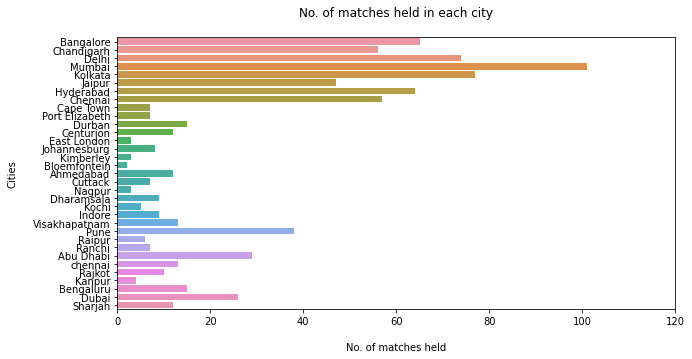

In [141]:
# Plot to visualise the number of matches held in each city
plt.figure(figsize=(10, 5))
sns.countplot(y=df['city'])
plt.title('No. of matches held in each city\n')
plt.xlabel('\nNo. of matches held')
plt.ylabel('Cities\n')
plt.xlim([0,120])
plt.show()

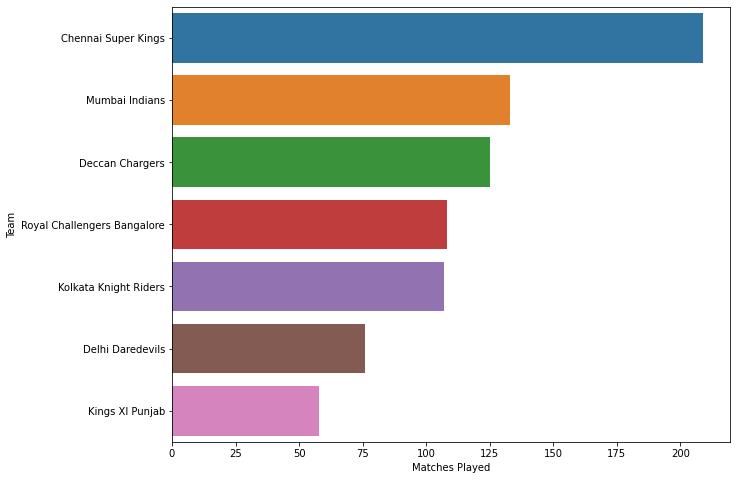

In [142]:
#IPL Matches Played by Each Team
plt.figure(figsize=(10,8))
data = df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data)
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

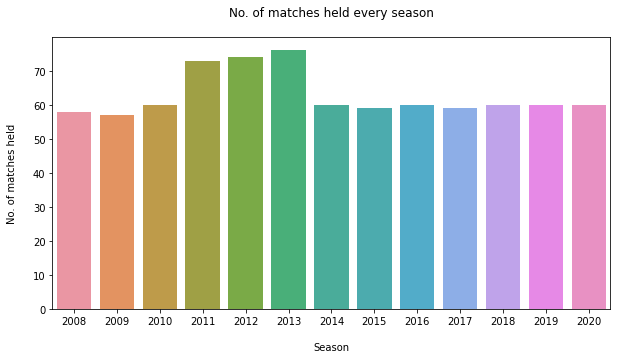

In [144]:
# Plot to visualize the number of matches held every season
plt.figure(figsize=(10,5))
sns.countplot(x=df['season'])
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

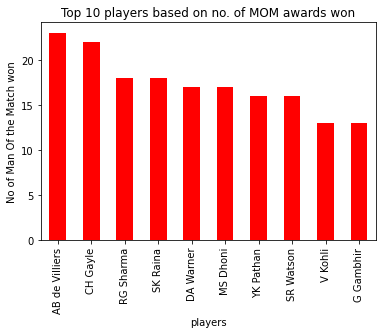

In [145]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
#plt.hist(df['player_of_match'],bins=30)
#plt.figure(figsize=(10,5))
plt.xticks(rotation=25)
df['player_of_match'].value_counts()[:10].plot(kind='bar',color='red')
plt.title('Top 10 players based on no. of MOM awards won')
plt.xlabel('players')
plt.ylabel('No of Man Of the Match won')
plt.show()

In [146]:
df['toss_winner'] = df['toss_winner'].astype(str)

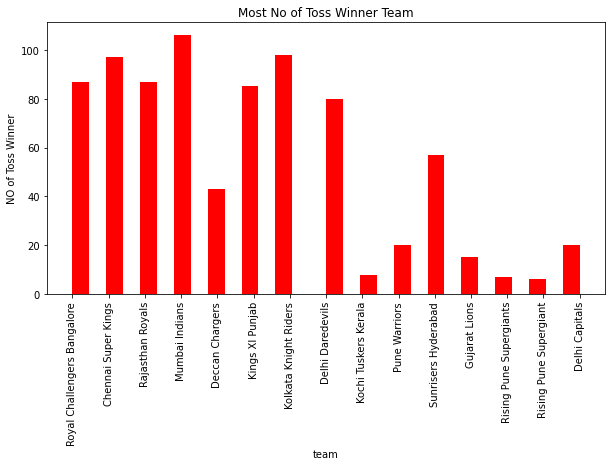

In [147]:
# Plot to visualise the Most No of Toss Winner Team
plt.figure(figsize=(10,5))
plt.hist(df['toss_winner'],color='red',bins=30)
plt.xticks(rotation=90)
plt.title('Most No of Toss Winner Team')
plt.xlabel('team')
plt.ylabel('NO of Toss Winner')
plt.show()

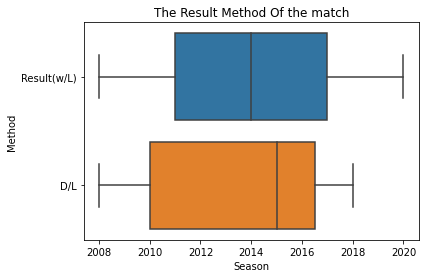

In [154]:
# Plot to visualize the Result Method Of the Match
sns.boxplot(x=df['season'],y=df['method'])
plt.title('The Result Method Of the match')
plt.xlabel('Season')
plt.ylabel('Method')
plt.show()

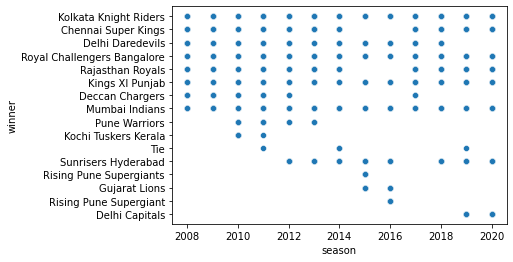

In [149]:
sns.scatterplot(x=df['season'],y=df['winner'])


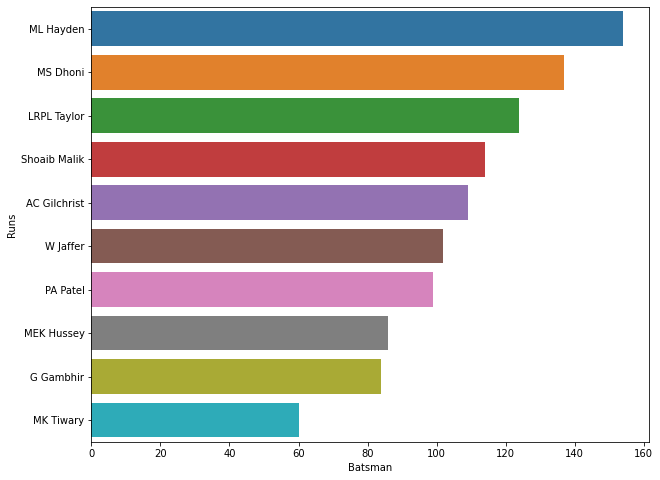

In [150]:
# Plot to visualize the Highest Run of the player
plt.figure(figsize=(10,8))
data = df.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

<Figure size 720x576 with 0 Axes>

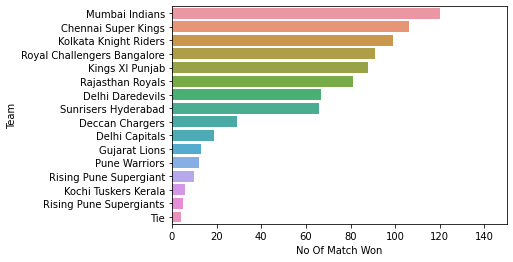

In [151]:
#Plot to visualize the Team Won the Most Number of Match
plt.figure(figsize=(10,8))
data = df['winner'].value_counts().sort_values(ascending=False)
fig, ax=plt.subplots()
ax.set_xlim([0,150])
sns.barplot(y=data.index,x=data)
plt.xlabel('No Of Match Won')
plt.ylabel('Team')
plt.show()

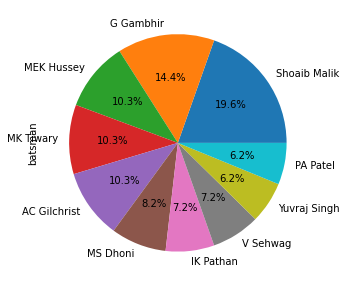

In [152]:
#Plot to visualize the Most Number of six hit by the Batsman
plt.figure(figsize=(10,5))
data = df[df['batsman_runs']==6]['batsman'].value_counts()[:10].sort_values(ascending=False)
data.plot.pie(autopct="%.1f%%");


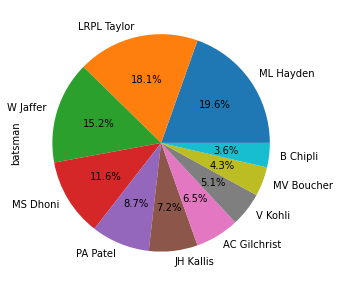

In [153]:
#Plot to visualize the Most Number of Four hit by the Batsman
plt.figure(figsize=(10,5))
data = df[df['batsman_runs']==4]['batsman'].value_counts()[:10].sort_values(ascending=False)
data.plot.pie(autopct="%.1f%%");
